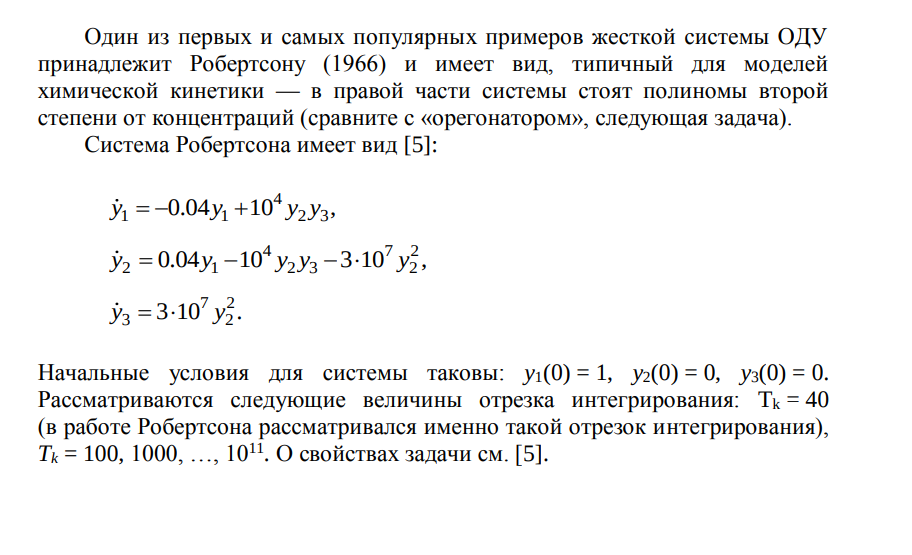
## Задача Робретсона имеет одно жесткое собственное число, близкое к -2000

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# Подсчитаем матрицу Якоби

def JacobianMatrix(vec):
    res = np.zeros((3, 3))
    res[0][0] = -0.04
    res[0][1] = 10**4 * vec[2]
    res[0][2] = 10**4 * vec[1]
    res[1][0] = 0.04
    res[1][1] = -10**4 * vec[2] - 6 * 10**7 * vec[1]
    res[1][2] = -10**4 * vec[1]
    res[2][0] = 0
    res[2][1] = 6 * 10**7 * vec[1]
    res[2][2] = 0
    return res
print("demonstrate JacobianMatrix")
print(JacobianMatrix(np.array([5, 5, 5])))

def funDU(vec):
    return np.array([-0.04 * vec[0] + (10**4) * vec[1]*vec[2],
                     0.04*vec[0] - 10**4 * vec[1]*vec[2] - 3 * (10**7) * (vec[1] ** 2),
                     3 * (10**7) * (vec[1]**2)])
print("Demonastrate funDU")
print(funDU([1, 0, 0]))

demonstrate JacobianMatrix
[[-4.0000e-02  5.0000e+04  5.0000e+04]
 [ 4.0000e-02 -3.0005e+08 -5.0000e+04]
 [ 0.0000e+00  3.0000e+08  0.0000e+00]]
Demonastrate funDU
[-0.04  0.04  0.  ]


In [122]:
a = 0.435866521508459
beta21 = a
beta31 = a

beta    = a * (6 * a * a - 3 * a + 2) / (6 * a * a - 6 * a + 1)

beta32 = beta - a
p1 = a
p3 = (6 * a * a - 6 * a + 1) / (6 * a * (beta - a))
p2 = (1 - 2 * a - 2 * beta * p3) / (2 * a)

h = 0.001

def ComputeK(vec):
    D = np.eye(3) - JacobianMatrix(vec) * a * h 
    k1 = np.linalg.solve(D, funDU(vec) * h)
    k2 = np.linalg.solve(D, h * funDU(vec + k1 * beta21))
    k3 = np.linalg.solve(D, h * funDU(vec + beta31*k1 + beta32 * k2))
    return k1, k2, k3
print ("Demonstrate ComputeK")
print(ComputeK(np.array([1, 0, 0])))

Demonstrate ComputeK
(array([-3.99993026e-05,  3.99993026e-05,  0.00000000e+00]), array([-3.99986053e-05,  3.08799012e-05,  9.11870401e-06]), array([-3.99927465e-05, -2.88658851e-05,  6.88586317e-05]))


[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.99960002e-01 2.97230194e-05 1.02753866e-05]
 [9.99920013e-01 3.60530568e-05 4.39342007e-05]
 ...
 [6.17237154e-01 6.15364624e-06 3.82756692e-01]
 [6.17236018e-01 6.15361876e-06 3.82757828e-01]
 [6.17234882e-01 6.15359127e-06 3.82758964e-01]]


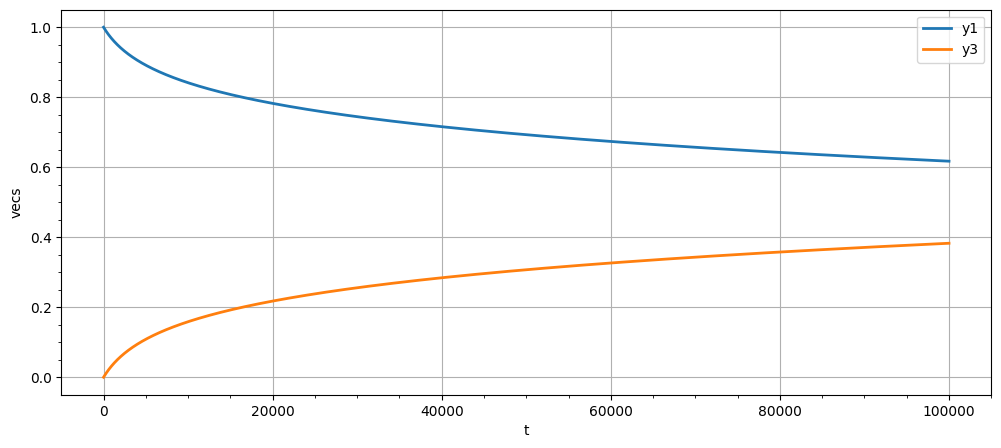

In [123]:
vecs = np.array([[1, 0.0, 0]])
size = 100000
dots = np.arange(size)
prev = vecs[0]
for i in dots:
    k1, k2, k3 = ComputeK(vecs[-1])
    new = prev + p1*k1 + p2*k2 + p3*k3
    #print(new)
    vecs = np.append(vecs, [new], axis=0)
    prev = new
print(vecs)
plt.figure(figsize=[12, 5], dpi=100)
transposed = vecs.transpose()
plt.plot(np.append(dots, size), transposed[0], linewidth=2, label='y1')

plt.plot(np.append(dots, size), transposed[2], linewidth=2, label='y3')

plt.xlabel("t")
plt.ylabel("vecs")
plt.legend()
plt.minorticks_on()
plt.grid()
plt.show()

## Таким образом, концентрации двух реагентов стремятся навствречу друг другу.
### Хотя жетскость системы пронаблюдать не удалось